<a href="https://colab.research.google.com/github/qkrtkddls135/bmt_python/blob/main/21407_11%EC%A3%BC%EC%B0%A8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
rng = pd.date_range('05/14/2021', periods=120, freq='S')
rng

DatetimeIndex(['2021-05-14 00:00:00', '2021-05-14 00:00:01',
               '2021-05-14 00:00:02', '2021-05-14 00:00:03',
               '2021-05-14 00:00:04', '2021-05-14 00:00:05',
               '2021-05-14 00:00:06', '2021-05-14 00:00:07',
               '2021-05-14 00:00:08', '2021-05-14 00:00:09',
               ...
               '2021-05-14 00:01:50', '2021-05-14 00:01:51',
               '2021-05-14 00:01:52', '2021-05-14 00:01:53',
               '2021-05-14 00:01:54', '2021-05-14 00:01:55',
               '2021-05-14 00:01:56', '2021-05-14 00:01:57',
               '2021-05-14 00:01:58', '2021-05-14 00:01:59'],
              dtype='datetime64[ns]', length=120, freq='S')

In [14]:
ts = pd.Series(np.random.randint(0, 10, len(rng)),index = rng)
ts

2021-05-14 00:00:00    8
2021-05-14 00:00:01    2
2021-05-14 00:00:02    5
2021-05-14 00:00:03    8
2021-05-14 00:00:04    9
                      ..
2021-05-14 00:01:55    5
2021-05-14 00:01:56    9
2021-05-14 00:01:57    9
2021-05-14 00:01:58    6
2021-05-14 00:01:59    4
Freq: S, Length: 120, dtype: int64

In [15]:
ts.resample('2min').sum()

2021-05-14    547
Freq: 2T, dtype: int64

In [16]:
rng = pd.date_range('20210514', periods=5, freq='D')

In [17]:
rng

DatetimeIndex(['2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18'],
              dtype='datetime64[ns]', freq='D')

In [18]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [19]:
ts

2021-05-14    0.234718
2021-05-15    1.325582
2021-05-16    0.941357
2021-05-17    1.254434
2021-05-18   -1.004203
Freq: D, dtype: float64

In [20]:
ts_utc = ts.tz_localize('UTC')

In [22]:
ts_utc

2021-05-14 00:00:00+00:00    0.234718
2021-05-15 00:00:00+00:00    1.325582
2021-05-16 00:00:00+00:00    0.941357
2021-05-17 00:00:00+00:00    1.254434
2021-05-18 00:00:00+00:00   -1.004203
Freq: D, dtype: float64

In [23]:
ts_utc_us=ts_utc.tz_convert('Asia/Seoul')

In [24]:
ts_utc_us

2021-05-14 09:00:00+09:00    0.234718
2021-05-15 09:00:00+09:00    1.325582
2021-05-16 09:00:00+09:00    0.941357
2021-05-17 09:00:00+09:00    1.254434
2021-05-18 09:00:00+09:00   -1.004203
Freq: D, dtype: float64

In [25]:
rng = pd.date_range('20210514', periods = 5, freq = 'M')

In [26]:
rng

DatetimeIndex(['2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30'],
              dtype='datetime64[ns]', freq='M')

In [27]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [28]:
ps = ts.to_period()
ps

2021-05    1.525315
2021-06   -0.954025
2021-07    0.027470
2021-08   -0.920320
2021-09    1.264968
Freq: M, dtype: float64

In [30]:
ps.to_timestamp()

2021-05-01    1.525315
2021-06-01   -0.954025
2021-07-01    0.027470
2021-08-01   -0.920320
2021-09-01    1.264968
Freq: MS, dtype: float64

In [32]:
prng = pd.period_range('2020Q1', '2021Q4', freq='Q-NOV')
prng

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [33]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [34]:
ts

2020Q1    1.698019
2020Q2   -2.103174
2020Q3    0.807653
2020Q4    2.157167
2021Q1   -0.240836
2021Q2   -0.824637
2021Q3   -0.379321
2021Q4    0.797724
Freq: Q-NOV, dtype: float64

In [35]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.index

PeriodIndex(['2020-03-01 09:00', '2020-06-01 09:00', '2020-09-01 09:00',
             '2020-12-01 09:00', '2021-03-01 09:00', '2021-06-01 09:00',
             '2021-09-01 09:00', '2021-12-01 09:00'],
            dtype='period[H]', freq='H')

In [64]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":['a','b','b','a','a','e']
})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [68]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [69]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [70]:
df['grade'] = df["grade"].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [71]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


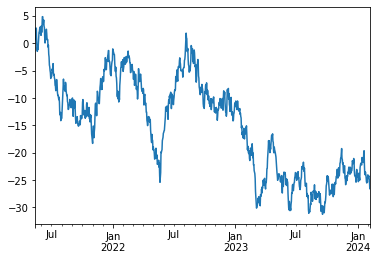

In [77]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('20210514', periods = 1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20210514', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns = ['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

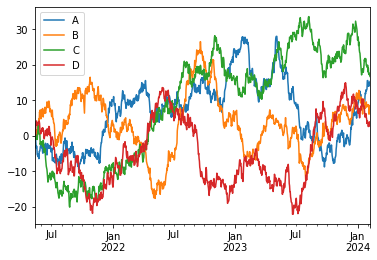

In [86]:
df.plot()

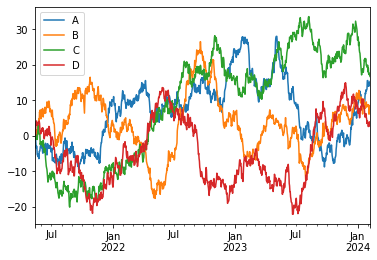

In [90]:
plt.figure

df.plot()

plt.legend(loc='best')

plt.show()

In [91]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":['a','b','b','a','a','e']
})

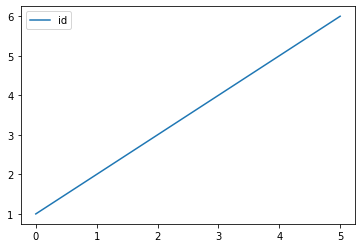

In [93]:
df.plot()

In [99]:
df = pd.DataFrame(np.random.randn(5,2), columns=list('AB'))

In [100]:
df

,A,B
0,0.379868,0.693943
1,0.220213,1.814147
2,-0.887734,-0.023723
3,-0.090177,-0.308134
4,0.235312,-0.460567


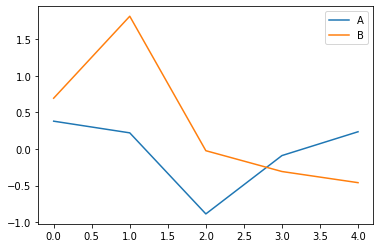

In [107]:
df.plot()

In [108]:
df

,A,B
0,0.379868,0.693943
1,0.220213,1.814147
2,-0.887734,-0.023723
3,-0.090177,-0.308134
4,0.235312,-0.460567


In [112]:
df.to_csv('foo.csv')

In [116]:
pd.read_csv('test.csv')

,Unnamed: 0,A,B
0,0,0.379868,0.693943
1,1,0.220213,1.814147
2,2,-0.887734,-0.023723
3,3,-0.090177,-0.308134
4,4,0.235312,-0.460567


In [118]:
#웹크롤링 날씨온도 찾기
from bs4 import BeautifulSoup as bs
from pprint import pprint
import requests

In [122]:
loc = "10110585"
html = requests.get("https://weather.naver.com/today/" + loc)

In [123]:
pprint(html.text)

('<!doctype html>\n'
 '<html lang="ko" data-platform="pc" data-useragent="python-requests/2.23.0">\n'
 '    <head>\n'
 '        <meta charset="utf-8">\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge">\n'
 '<meta name="viewport" '
 'content="width=device-width,initial-scale=1.0,user-scalable=no,maximum-scale=1">\n'
 '<meta name="format-detection" content="telephone=no">\n'
 '<meta property="og:title" content="네이버 날씨"/>\n'
 '<meta property="og:url" content="http://weather.naver.com/today/10110585"/>\n'
 '<meta property="og:image" '
 'content="https://ssl.pstatic.net/static/weather/m/og_weather.png"/>\n'
 '<meta property="og:description" content="국내외 날씨와 미세먼지에 대한 종합정보 제공"/>\n'
 '<link rel="shortcut icon" '
 'href="https://ssl.pstatic.net/static/www/nFavicon24.png" '
 'type="image/x-icon">\n'
 '<link rel="preload" '
 'href="https://ssl.pstatic.net/static/weather/font/NotoSans-Regular.woff2" '
 'as="font" type="font/woff2" crossorigin="anonymous">\n'
 '    <link rel="preload" '
 'h

In [125]:
soup = bs(html.text, 'html.parser')

In [126]:
soup

<!DOCTYPE doctype html>

<html data-platform="pc" data-useragent="python-requests/2.23.0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,user-scalable=no,maximum-scale=1" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="네이버 날씨" property="og:title">
<meta content="http://weather.naver.com/today/10110585" property="og:url">
<meta content="https://ssl.pstatic.net/static/weather/m/og_weather.png" property="og:image">
<meta content="국내외 날씨와 미세먼지에 대한 종합정보 제공" property="og:description">
<link href="https://ssl.pstatic.net/static/www/nFavicon24.png" rel="shortcut icon" type="image/x-icon"/>
<link as="font" crossorigin="anonymous" href="https://ssl.pstatic.net/static/weather/font/NotoSans-Regular.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="anonymous" href="https://ssl.pstatic.net/static/weather/font/NotoSans-Light.woff2" rel="prel

In [127]:
data1 = soup.find('div', {'data-region-code':loc})

In [128]:
data1

<div class="is_weather" data-region-code="10110585" id="wrap">
<div class=" shadow" id="header" role="banner">
<div class="gnb_area">
<div class="content_inner">
<h1 class="logo_area">
<a class="logo" href="https://www.naver.com" onclick="nclk_v2(this, 'gnb.naver', '', '')"><span class="blind">NAVER</span></a>
<span class="blind">날씨</span>
</h1>
<div class="location_area">
<span class="blind">현위치</span>
<strong class="location_name">중구 중앙동</strong>
<button class="btn_location" data-loading-class="loading" onclick="nclk_v2(this, 'gnb.curloc', '', '')" type="button"><span class="blind">내위치 찾기</span></button>
</div>
<div class="gnb_group">
<div id="gnb">
</div>
</div>
<div class="button_group">
<button class="btn_search _cnSearchPopup" onclick="nclk_v2(this, 'gnb.search', '', '')" type="button">
<span class="icon_animation">
<span class="icon_search"></span>
</span>
<span class="blind">검색 펼치기</span>
</button>
<div class="layer_search">
<h2 class="blind">도시 별 날씨 검색</h2>
<div class="layer_c

In [129]:
data2 = data1.find('div', {'class':'weather_area'})

In [130]:
data2

<div class="weather_area">
<strong class="current"><span class="blind">현재 온도</span>24<span class="degree">°</span></strong>
<p class="summary">
                어제보다 <span class="temperature down">1° <span class="blind">낮아요</span></span><span class="weather before_slash">맑음</span>
</p>
<dl class="summary_list">
<dt class="term">습도</dt>
<dd class="desc">60%</dd>
<dt class="term">남동풍</dt>
<dd class="desc">2m/s</dd>
<dt class="term">체감</dt>
<dd class="desc">26°</dd>
</dl>
</div>

In [132]:
data3 = data2.find('strong', {'class':'current'}).text

In [133]:
data3

'현재 온도24°'

In [134]:
current_temp = data3[5:].strip()

In [135]:
current_temp

'24°'

In [136]:
if loc == "10110585":
  loc_text = "울산 중구 중앙동의 현재 온도"
  print("{}는 {}입니다.".format(loc_text, current_temp))
else:
  print("{}는 {}입니다.".format(loc, current_temp))

울산 중구 중앙동의 현재 온도는 24°입니다.
